In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

ModuleNotFoundError: No module named 'pandas'

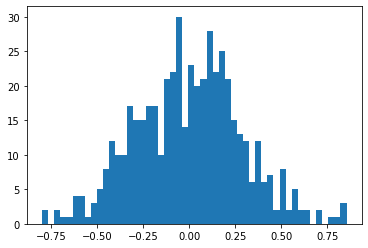

In [ ]:
# https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy
def get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1):
    return truncnorm(
        (low - mean)/sd, 
        (upp - mean)/sd, 
        loc = mean, 
        scale = sd)

X = get_truncated_normal()
plt.hist(X.rvs(500), bins = 50)
plt.show()

In [ ]:
class post:
    
    def __init__(self, kind):
        self.type = kind   # binary: either post (1) or comment (0)
        self.ideology = get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1).rvs()  # post's ideology score
        self.trust = get_truncated_normal(mean=0.5, sd=0.15, low=0, upp=1).rvs()   # post's trustworthiness

In [ ]:
class user:
    def __init__(self):
        self.ideology = get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1).rvs()
        self.care = get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1).rvs()

def create_n_users (n):
    user_list = []
    for i in range(n):
        user_list.append(user())
    return user_list

In [ ]:
newpost = post(1)
print(newpost.type, newpost.ideology, newpost.trust)

user_list = create_n_users(100)
for user in user_list:
    print(user.ideology, user.care)

1 0.33872191977178234 0.467153979531099
